# Análise de Fourier Instrumental

In [1]:
%%html
<iframe scrolling="no" title="Geometric Fourier Transform" src="https://www.geogebra.org/material/iframe/id/puk5qdUk/width/1220/height/909/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/true/rc/false/ld/false/sdz/true/ctl/false" width="1220px" height="909px" style="border:0px;"> </iframe>

In [2]:
from numpy import load, abs, log10, real, DataSource
from matplotlib import pyplot as plt

# O arquivo 'data_temp_SP.npy' contém a temperatura média de São Paulo e SBC, diariamente, de 1973 a 2019 
# fonte: NOAA https://www.ncdc.noaa.gov/
# vamos baixar este arquivo e abrí-lo diretamente com o numpy
url = 'https://github.com/borismarin/sample-data/blob/master/neuro-comp/data_temp_SP.npy?raw=true'
dados = DataSource().open(url, 'rb')
data, temp = load(dados, allow_pickle=True)[12000:].T # olharemos aprox. de 2006 a 2019 (ponto 12000 em diante)

Text(0, 0.5, 'temperatura média SP / SBC($\\degree C$)')

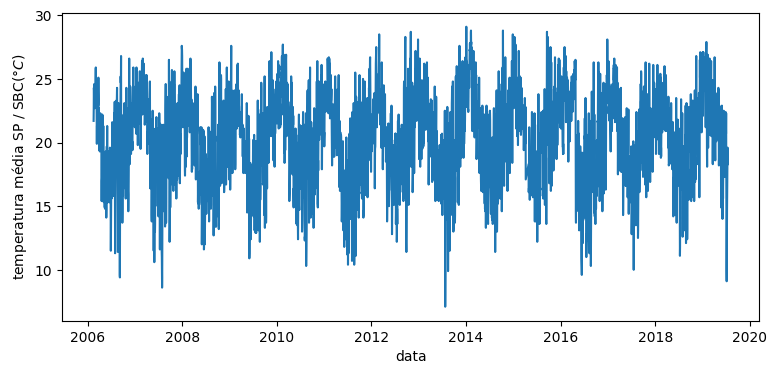

In [3]:
plt.figure(1, figsize=(9,4))
plt.plot(data, temp)
plt.xlabel('data')
plt.ylabel('temperatura média SP / SBC($\degree C$)')

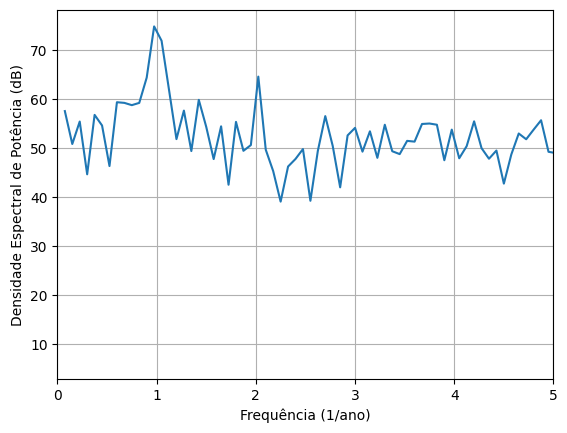

In [4]:
from scipy.fftpack import fft, ifft, fftfreq

temp_fft = fft(temp)  # transformada de Fourier do sinal temp(t)
temp_dep = abs(temp_fft) ** 2 # densidade espectral de potência 

# convertemos de índices na lista para frequências 
# (frequência 1 corresponde a 1 ano)
freqs = fftfreq(len(temp_dep), 1. / 365)  

i = freqs > 0  # fftfreq retorna frequências positivas e negativas
                 #  como nosso sinal é Real, basta tomar as positivas
plt.figure(2)
plt.plot(freqs[i], 10 * log10(temp_dep[i])) # vamos plotar o espectro em dB
plt.xlim(0, 5)
plt.xlabel('Frequência (1/ano)')
plt.ylabel('Densidade Espectral de Potência (dB)')
plt.grid()

Text(0, 0.5, 'temperatura média SP / SBC($\\degree C$)')

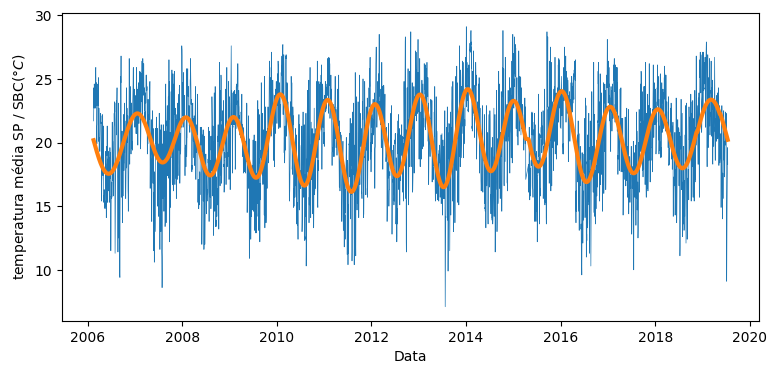

In [5]:
# filtraremos frequências acima da fundamental (1/ano)
temp_fft_filtrada = temp_fft.copy()
temp_fft_filtrada[abs(freqs) > 1.1] = 0 # partes do sinal com freq>1.1 cortadas

temp_lenta = real(ifft(temp_fft_filtrada)) # retomamos o sinal com a transformada inversa de Fourier
plt.figure(3, figsize=(9,4))
plt.plot(data, temp, lw=0.5) # série original
plt.plot(data, temp_lenta, lw=3) # série filtrada
plt.xlabel('Data')
plt.ylabel('temperatura média SP / SBC($\degree C$)')